In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

 99% 86.0M/86.8M [00:05<00:00, 23.1MB/s]
100% 86.8M/86.8M [00:05<00:00, 17.1MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/brain-tumor-classification-mri.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

brain-tumor-classification-mri.zip  kaggle.json  sample_data  Testing  Training


In [ ]:
import os
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [ ]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from google.colab.patches import cv2_imshow
from sklearn.utils import shuffle
import tensorflow as tf
import numpy as np
import pandas as pd

In [ ]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
  folderPath = os.path.join('/content/Training',i)
  for j in os.listdir(folderPath):
    img = cv2.imread(os.path.join(folderPath,j))
    img = cv2.resize(img,(image_size,image_size), interpolation = cv2.INTER_LINEAR)
    X_train.append(img)
    Y_train.append(i)


for i in labels:
  folderPath = os.path.join('/content/Testing',i)
  for j in os.listdir(folderPath):
    img = cv2.imread(os.path.join(folderPath,j))
    img = cv2.resize(img,(image_size,image_size), interpolation = cv2.INTER_LINEAR)
    X_train.append(img)
    Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
X_train,Y_train = shuffle(X_train,Y_train, random_state = 101)
X_train.shape

(3264, 150, 150, 3)

Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train,Y_train, test_size = 0.1,random_state = 101)

Labels

In [ ]:
y_train_new = []
for i in y_train:
  y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
  y_test_new.append(labels.index(i))
y_test = y_train_new
y_test = tf.keras.utils.to_categorical(y_test)

###Model Building (Convolutional Neural Network)

In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation = 'relu', input_shape = (150,150,3)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(256,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(4, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [ ]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train,y_train, epochs = 100, validation_split = 0.1)

Epoch 1/100
83/83 [==============================] - 8s 100ms/step - loss: 0.0859 - accuracy: 0.9716 - val_loss: 0.2656 - val_accuracy: 0.9184
Epoch 2/100
83/83 [==============================] - 8s 100ms/step - loss: 0.0798 - accuracy: 0.9716 - val_loss: 0.2673 - val_accuracy: 0.9184
Epoch 3/100
83/83 [==============================] - 8s 99ms/step - loss: 0.0935 - accuracy: 0.9690 - val_loss: 0.4008 - val_accuracy: 0.9048
Epoch 4/100
83/83 [==============================] - 8s 97ms/step - loss: 0.0902 - accuracy: 0.9697 - val_loss: 0.3491 - val_accuracy: 0.8878
Epoch 5/100
83/83 [==============================] - 8s 99ms/step - loss: 0.0894 - accuracy: 0.9750 - val_loss: 0.3327 - val_accuracy: 0.9082
Epoch 6/100
83/83 [==============================] - 8s 97ms/step - loss: 0.0547 - accuracy: 0.9815 - val_loss: 0.4648 - val_accuracy: 0.8741
Epoch 7/100
83/83 [==============================] - 8s 95ms/step - loss: 0.0858 - accuracy: 0.9765 - val_loss: 0.2993 - val_accuracy: 0.9320
Epoc

Path of the image to be predicted: /content/Testing/glioma_tumor/image(30).jpg


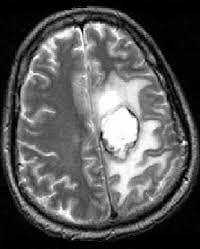

1/1 [==============================] - 0s 21ms/step
[[0.11230821 0.04498511 0.76431865 0.07838801]]
2
NO


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (150,150))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,150,150,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('GLIOMA')

elif input_pred_label ==1:

  print('MENIGIOMA')
elif input_pred_label ==2:
  print('NO')
elif input_pred_label ==3:
  print('PITUITARY')